In [ ]:
## Plant Disease Classification Using Deep Learning

In this project, We will use deep learning to classify Plant diseases. The dataset contains  leaf images  of three categories: healthy leaves, Yellow_Leaf_Curl_Virus-affected leaves, and Bacterial spot-affected leaves. The dataset is downloaded from Kaggle.

At the end of the first part of the lesson,each student will be abble to:
1. Read multiple images in a folder
2. Understand tensorflow and keras
3. Use the matplotlib library to plot images
4. Do data preprocessing
5. CNN model

In [ ]:
#import librabries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [4]:
images_dataset=tf.keras.preprocessing.image_dataset_from_directory(
 'PlantVillage',
 shuffle=True,
 image_size=(IMAGE_SIZE,IMAGE_SIZE),
 batch_size=BATCH_SIZE,
 
)

Found 9078 files belonging to 6 classes.


In [5]:
class_names=images_dataset.class_names
class_names

['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_healthy']

In [6]:
len(images_dataset)

284

In [7]:
#exploring the dataset
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[4 4 3 3 4 0 4 4 0 4 3 4 0 3 5 4 5 4 3 1 5 4 1 4 4 4 5 4 3 5 4 1]


In [8]:
#print first image in that batch
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch[0].numpy())


[[[ 85.  77.  90.]
  [ 93.  85.  98.]
  [112. 104. 117.]
  ...
  [120. 114. 126.]
  [111. 105. 117.]
  [112. 106. 118.]]

 [[116. 108. 121.]
  [ 76.  68.  81.]
  [156. 148. 161.]
  ...
  [108. 102. 114.]
  [141. 135. 147.]
  [170. 164. 176.]]

 [[109. 101. 114.]
  [120. 112. 125.]
  [135. 127. 140.]
  ...
  [102.  96. 108.]
  [134. 128. 140.]
  [153. 147. 159.]]

 ...

 [[130. 123. 139.]
  [101.  94. 110.]
  [ 65.  58.  74.]
  ...
  [125. 121. 136.]
  [127. 123. 138.]
  [197. 193. 208.]]

 [[119. 112. 128.]
  [162. 155. 171.]
  [ 80.  73.  89.]
  ...
  [132. 128. 143.]
  [118. 114. 129.]
  [100.  96. 111.]]

 [[126. 119. 135.]
  [111. 104. 120.]
  [104.  97. 113.]
  ...
  [102.  98. 113.]
  [161. 157. 172.]
  [126. 122. 137.]]]


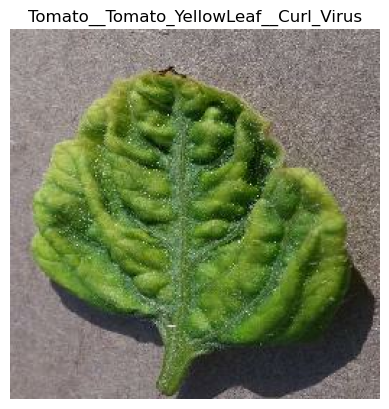

In [9]:
#visualize the first image in that batch
for image_batch, label_batch in images_dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')


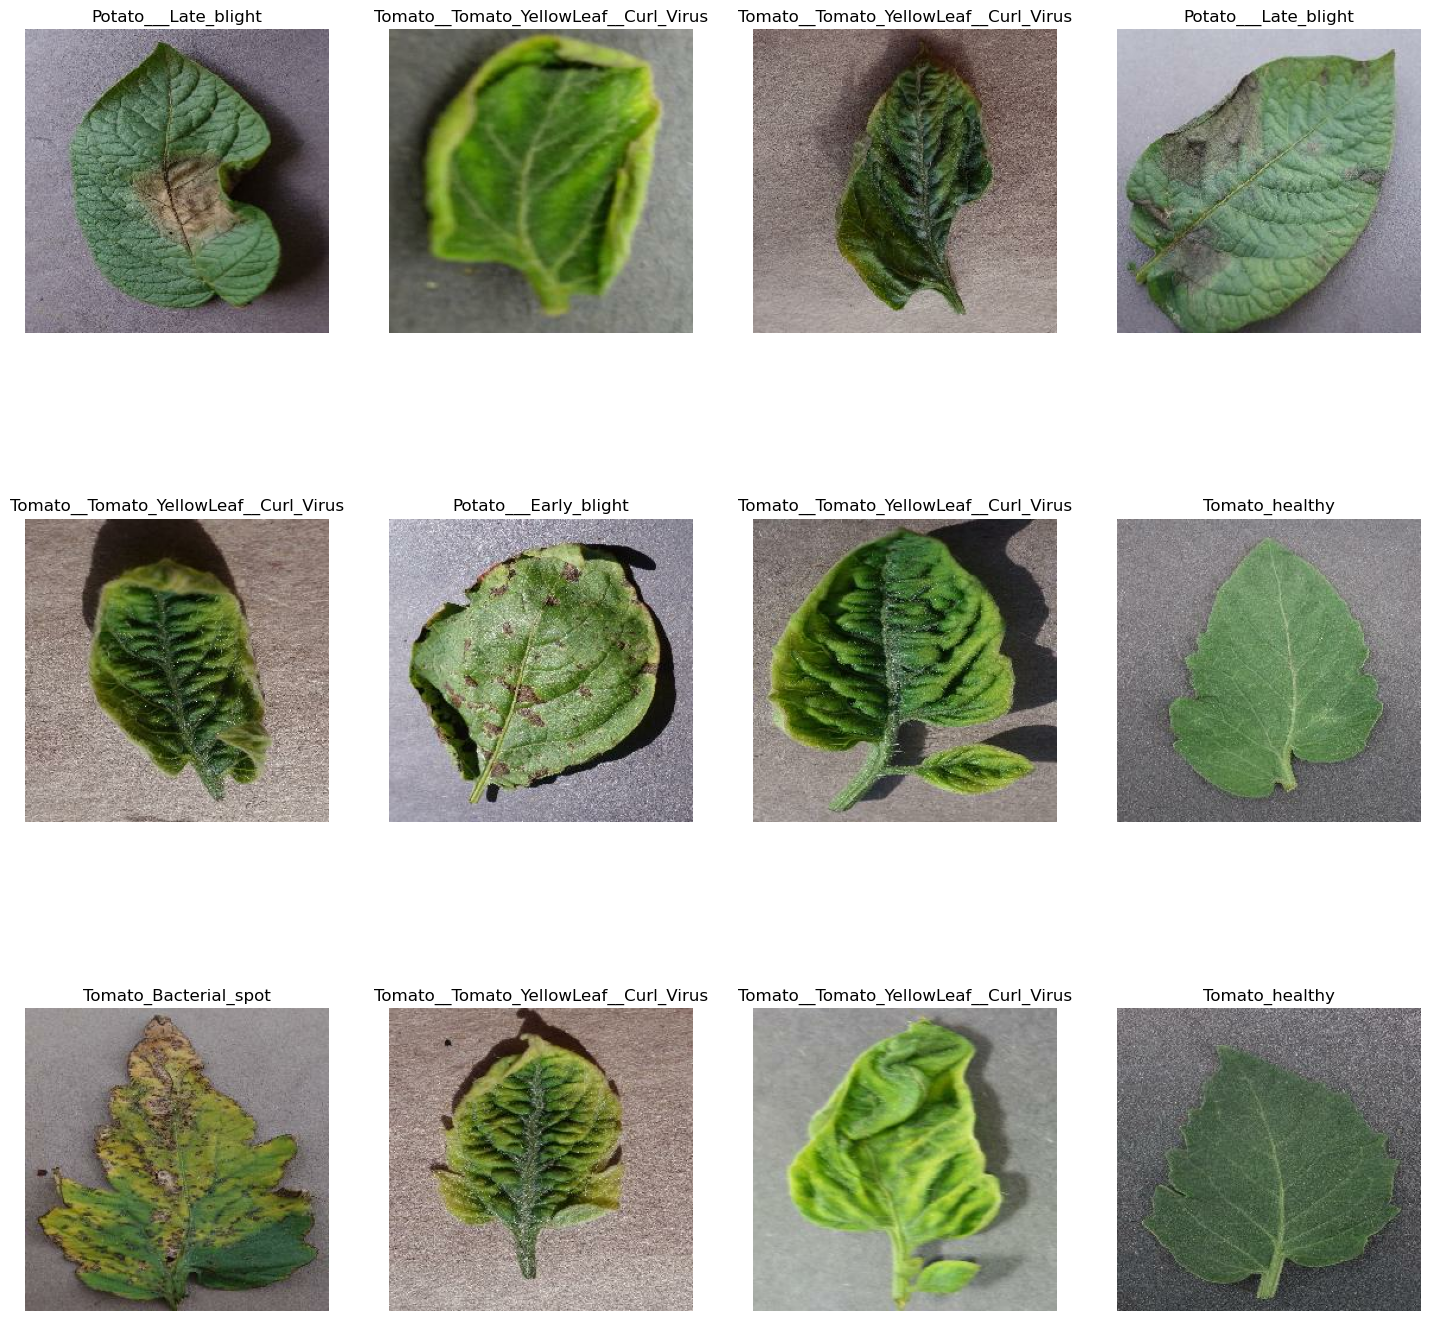

In [10]:
#visualize the first image in that batch
plt.figure(figsize=(18,18))
for image_batch, label_batch in images_dataset.take(1):
    for i in range (12):
        ax=plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [11]:
len(images_dataset)

284

In [12]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size= int(train_split* ds_size)
    val_size=int(val_split* ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [13]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(images_dataset)

In [14]:
print(len(train_ds),len(val_ds),len(test_ds))


227 28 29


In [15]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [16]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [17]:
data_augmentation=tf.keras.Sequential([
    
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [18]:
#Convolutional Neural Network

In [19]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model with fewer epochs and a subset of the dataset
history = model.fit(train_ds.take(50), validation_data=val_ds.take(20), epochs=4)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print("Test accuracy:", test_accuracy)



Epoch 1/4


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 [==============================] - 99s 2s/step - loss: 1.5483 - accuracy: 0.4642 - val_loss: 0.7688 - val_accuracy: 0.7641
Epoch 2/4
50/50 [==============================] - 70s 1s/step - loss: 0.5175 - accuracy: 0.8213 - val_loss: 0.6910 - val_accuracy: 0.7422
Epoch 3/4
50/50 [==============================] - 68s 1s/step - loss: 0.4072 - accuracy: 0.8587 - val_loss: 0.6742 - val_accuracy: 0.7656
Epoch 4/4
29/29 [==============================] - 19s 306ms/step - loss: 0.3915 - accuracy: 0.8470
Test accuracy: 0.8469827771186829
